<a href="https://colab.research.google.com/github/DiahKurnillah/Praktikum-Komputasi-Biomedis/blob/main/KombioPrak_ChapII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2. Finding-Root Method: Bisection & Regula-Falsi**


---

**Tujuan**: To determine the roots of function by using Bisection and Regula-Falsi method.

**Literature Review**

Masalah pencarian akar adalah salah satu masalah paling dasar dalam analisis numerik. Jika kita memiliki sebuah fungsi $f(x)$, proses untuk menemukan akar dari fungsi ini melibatkan pencarian nilai $x$ ketika $f(x) = 0$. Ketika fungsi tersebut sama dengan $0$, maka nilai $x$ dari fungsi tersebut adalah akarnya, yang disebut sebagai nol dari fungsi $f(x)$. Salah satu metode untuk menemukan akar ini adalah metode pembagian dua atau metode interval halving atau metode pencarian biner atau metode dikotomi.

Jika fungsi sama dengan $0$, $x$ adalah akar dari fungsi tersebut. Akar dari persamaan $f(x) = 0$ juga disebut $0$ dari fungsi $f(x)$. Metode Bisection juga disebut metode interval halving, metode pencarian biner, atau metode dikotomi. Metode ini didasarkan pada teorema Bolzano untuk fungsi kontinu. Teorema (Bolzano): Jika sebuah fungsi $f(x)$ kontinu pada sebuah interval $[a, b]$ dan $f(a)-f(b) < 0$, maka sebuah nilai $c ∈ (a, b)$ ada yang membuat $f(c) = 0$.
Metode ini dimulai dengan memilih dua buah bilangan, membuat interval di antara kedua bilangan tersebut dengan mengambil setengah dari bilangan tersebut, dan membuat interval tersebut semakin lama semakin kecil. Kedua bilangan tersebut harus memiliki hasil fungsi dengan tanda yang berlawanan. Sebagai contoh, ada dua buah bilangan, a dan b. $f(a)$ dan $f(b)$ harus memiliki **tanda yang berlawanan** sehingga $f(a).f(b) < 0$. Kemudian, angka median $r$ diambil dari $(a+b)/2$. Jika $f(r)$ harus diuji dengan menggunakan salah satu dari $f(a)$ atau $f(b)$. Jika hasil dari $f(r).f(a) < 0$ maka hasil tersebut akan digunakan sebagai interval yang baru. Proses ini diulangi sampai interval mencapai $0$ atau mendekati $0$ sesuai dengan kesalahan.

Metode lainnya adalah Regula-Falsi. Metode ini dimulai dengan mendefinisikan interval awal $[a, b]$ sehingga $f(a) . f(b) < 0$. Pada metode ini, titik $r$ tidak tepat berada di tengah-tengah. Titik $r$ sedikit dekat dengan a atau b. Titik $r$ dihitung dengan menggunakan persamaan di bawah ini: $$𝑟 = 𝑎 - 𝑓(𝑎) (𝑎 - 𝑏) / 𝑓(𝑎) - 𝑓(𝑏)$$
Setelah itu, interval baru ditentukan dengan menggunakan metode yang sama dengan metode bisection yaitu dengan memeriksa apakah $f(a) . f(r) < 0$ atau $f(b) . f(r) < 0$. Jika $f(a) . f(r) < 0$ maka interval yang baru adalah a dan r, jika tidak maka interval yang baru adalah r dan b. Proses ini diulang sampai ditemukan nilai yang paling dekat dengan error terkecil.

## Preliminary Task

Jika terdapat sebuah fungsi sebagai berikut: $$𝑓(𝑥) = 𝑥-2cos(𝑥)[0,𝜋/2]$$
Tentukan akar-akarnya dalam interval yang diberikan dengan menggunakan metode Bisection dan Regula-Falsi.

**Bisection method**

Iterasi   |   r   |   f(r)
1         | 0.7854| -0.6288
2         | 1.1781| 0.4127
3         | 0.9817| -0.1294
4         | 1.0799| 0.1371
5         | 1.0308| 0.0026
6         | 1.0063| -0.0637
7         | 1.0186| -0.0306
8         | 1.0247| -0.0140
9         | 1.0278| -0.0057
10        | 1.0293| -0.0015
11        | 1.0301| 0.0005
12        | 1.0297| -0.0005
13        | 1.0299| 0.0000
Convergence achieved.


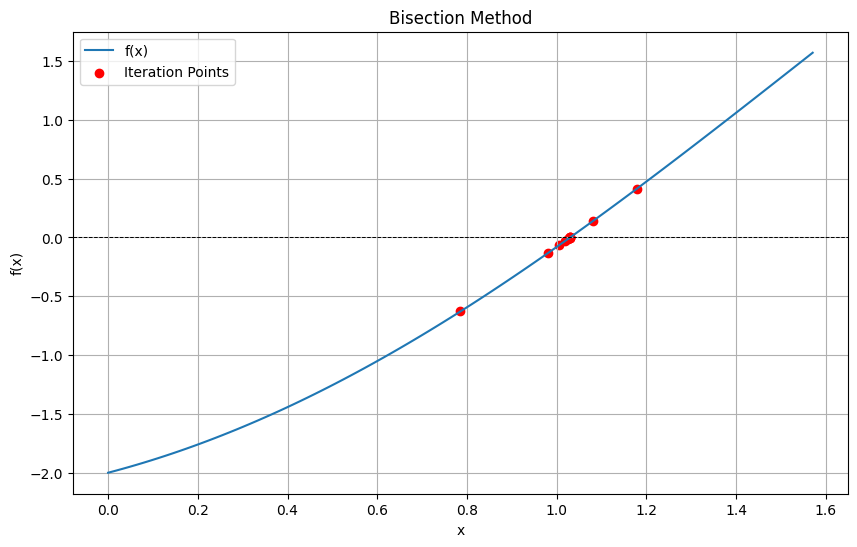

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x - 2 * np.cos(x)

# Define the interval [a, b]
a = 0
b = np.pi / 2

# Define the maximum number of iterations and maximum error
maxit = 100
maxer = 0.0001

# Initialize n
n = 1

# Lists to store iteration data for plotting
iterations = []
r_values = []
f_values = []

print("Iterasi   |   r   |   f(r)")
print('============================')
# Repeat the following steps while n is less than or equal to maxit
while n <= maxit:
    # Calculate the midpoint r
    r = (a + b) / 2

    # Append data for plotting
    iterations.append(n)
    r_values.append(r)
    f_values.append(f(r))

    # Print the iteration information in a tabular format
    print(f"{n:<10}| {r:<6.4f}| {f(r):<6.4f}")

    # Check convergence criteria
    if abs(f(r)) <= maxer or abs(a - b) <= maxer:
        print("Convergence achieved.")
        break

    # Update the interval [a, b] based on the sign of f(r)
    if f(a) * f(r) < 0:
        b = r
    else:
        a = r

    # Increment n
    n += 1

# If the loop exits without convergence, print an error message
if n > maxit:
    print("Algorithm fails: no convergence.")

# Plot the function f(x)
x_values = np.linspace(0, np.pi / 2, 100)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(r_values, f_values, c='red', marker='o', label='Iteration Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Bisection Method')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.show()



**Regula-Falsi Method**

Iteration   |   r   |   f(r)
1           | 0.8798| -0.3948
2           | 1.0186| -0.0305
3           | 1.0291| -0.0020
4           | 1.0298| -0.0001
5           | 1.0299| -0.0000
6           | 1.0299| -0.0000
Convergence achieved.


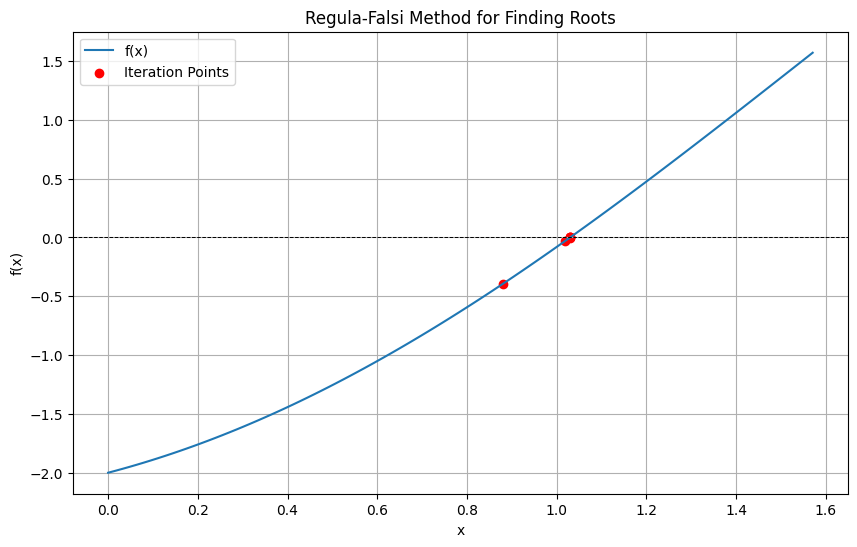

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return x - 2 * np.cos(x)

# Define the interval [a, b]
a = 0
b = np.pi / 2

# Define the maximum number of iterations and maximum error
maxit = 100
maxer = 1e-6

# Initialize n
n = 1

# Lists to store iteration data for plotting
iterations = []
r_values = []
f_values = []

print("Iteration   |   r   |   f(r)")
print('============================')

# Repeat the following steps while n is less than or equal to maxit
while n <= maxit:
    # Calculate r using the Regula-Falsi formula
    r = a - (f(a) * (a - b)) / (f(a) - f(b))

    # Calculate f(r)
    fr = f(r)

    # Append data for plotting
    iterations.append(n)
    r_values.append(r)
    f_values.append(fr)

    # Print the iteration information in a tabular format
    print(f"{n:<12}| {r:<6.4f}| {fr:<6.4f}")

    # Check convergence criteria
    if abs(fr) <= maxer or abs(a - b) <= maxer:
        print("Convergence achieved.")
        break

    # Update the interval [a, b] based on the sign of f(r)
    if f(r) * f(a) < 0:
        b = r
    else:
        a = r

    # Increment n
    n += 1

# If the loop exits without convergence, print an error message
if n > maxit:
    print("Algorithm fails: no convergence.")

# Plot the function f(x)
x_values = np.linspace(0, np.pi / 2, 100)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(r_values, f_values, c='red', marker='o', label='Iteration Points')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regula-Falsi Method for Finding Roots')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.show()


## Task
Packed bed column. A column packed with spherical particles provides high surface area geometry that is useful in isolating specific protein(s) or other biological molecules from a cell lysate mixture. The Ergun equation relates the pressure drop through a packed bed of spheres to various fluid and geometric parameters of the bed:


> Δ𝒑/𝒍=(𝟏𝟓𝟎(𝟏−𝜺)^𝟐𝝁𝒖/𝒅𝒑^𝟐)+(𝟏.𝟕𝟓(𝟏−𝜺)𝝆𝒖^𝟐/𝒅𝒑)



```
Δ𝒑/𝒍=(𝟏𝟓𝟎(𝟏−𝜺)**𝟐𝝁𝒖/𝒅𝒑**𝟐)+(𝟏.𝟕𝟓(𝟏−𝜺)𝝆𝒖**𝟐/𝒅𝒑)
```


Where Δp is the pressure drop, l is the length of the column, ε is the porosity, μ is the fluid viscosity, u is the fluid velocity, dp is the diameter of the spherical particles, and ρ is the fluid density. For a 20 cm column, packed with 1 mm spheres and perfused with a buffer of equal viscosity and density to water (μ = 0.01 P, ρ = 1 g/cm3). By using the bisection and Regula-Falsi method, determine the column porosity if the pressure drop for a fluid flowing is 810.5 dyn/cm2 with velocity u = 0.75 cm/s. Make sure that you use consistent units throughout your calculation.
Using a starting interval of 0.1 < ε < 0.9, report the number of iterations necessary to determine the porosity to within 0.01 (tolerance).

Substitusi variable ke dalam persamaan Ergun:

$\Delta p/l = 150 \left(\frac{{(1-\varepsilon)^2 \mu u}}{{d_p^2}}\right) + 1.75 \frac{{(1-\varepsilon) \rho u^2}}{{d_p}}$

$\frac{{810.5}}{{20}} = 150 \left(\frac{{(1-\varepsilon)^2 \times 0.01 \times 0.75}}{{0.1^2}}\right) + 1.75 \frac{{(1-\varepsilon) \times 1 \times 0.75^2}}{{0.1}}$

$40.525 = 150 \left(\frac{{(1-\varepsilon)^2 \times 0.0075}}{{0.1^2}}\right) + 1.75 \frac{{(1-\varepsilon) \times 0.5625}}{{0.1}}$

$40.525 = 150(1-\varepsilon)^2 \times 0.75 + 1.75(1-\varepsilon) \times 5.625$

$40.525 = 112.5(1-\varepsilon)^2 + 9.84375(1-\varepsilon)$

$40.525 = 112.5\varepsilon^2 - 225\varepsilon + 112.5 + 9.84375 - 9.84375\varepsilon$

$0 = 112.5\varepsilon^2 - 234.84375\varepsilon + 81.81875$

$f(\varepsilon) = 112.5\varepsilon^2 - 234.84375\varepsilon + 81.81875$









Bisection Method
Iteration   |   ε   |   f(ε)
1           | 0.5000| -7.4779
2           | 0.3000| 21.4909
3           | 0.4000| 5.8815
4           | 0.4500| -1.0794
5           | 0.4250| 2.3307
6           | 0.4375| 0.6081
7           | 0.4437| -0.2401
8           | 0.4406| 0.1829
Convergence achieved in Bisection Method.
----------------------------------------------------
Regula-Falsi Method
Iteration   |   ε   |   f(ε)
1           | 0.4420| -0.0009
Convergence achieved in Regula-Falsi Method.


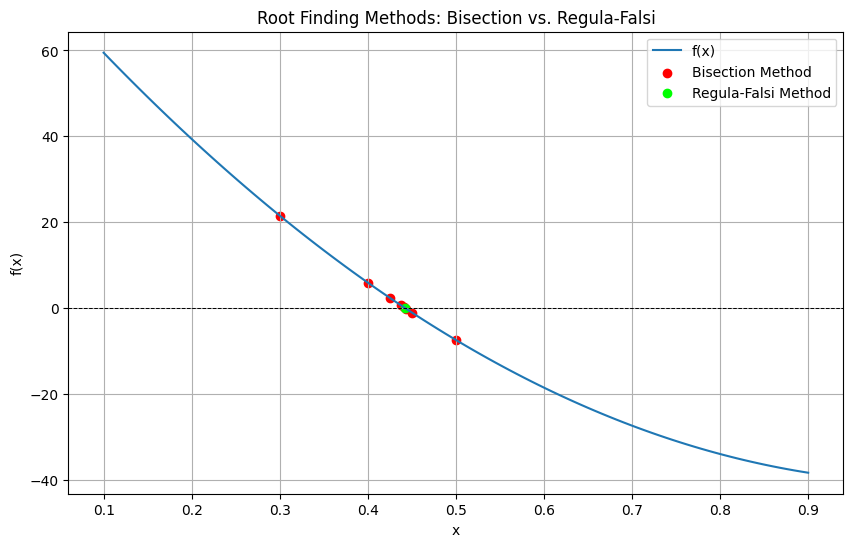

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    y = 112.5*x**2 - 234.84375*x + 81.819
    return y

# Define the interval [a, b]
a = 0.1
b = 0.9

# Define the maximum number of iterations and maximum error
maxit = 100
maxer = 0.01

# Initialize n
n = 1

# Lists to store iteration data for both methods
iterations_bisection = []
r_values_bisection = []
f_values_bisection = []

iterations_regula_falsi = []
c_values_regula_falsi = []
f_values_regula_falsi = []

# Print the table header for both methods
print("Bisection Method")
print("Iteration   |   ε   |   f(ε)")
print('============================')

# Repeat the Bisection Method steps while n is less than or equal to maxit
while n <= maxit:
    # Calculate the midpoint r
    r = (a + b) / 2

    # Append data for Bisection Method
    iterations_bisection.append(n)
    r_values_bisection.append(r)
    f_values_bisection.append(f(r))

    # Print the Bisection Method iteration information in a tabular format
    print(f"{n:<12}| {r:<6.4f}| {f(r):<6.4f}")

    # Check convergence criteria for Bisection Method
    if abs(f(r)) <= maxer or abs(a - b) <= maxer:
        print("Convergence achieved in Bisection Method.")
        break

    # Update the interval [a, b] based on the sign of f(r) for Bisection Method
    if f(a) * f(r) < 0:
        b = r
    else:
        a = r

    # Increment n for Bisection Method
    n += 1

# If the Bisection Method loop exits without convergence, print an error message
if n > maxit:
    print("Bisection Method fails: no convergence.")

# Print a separator
print ('----------------------------------------------------')

# Reset n for the Regula-Falsi Method
n = 1

# Print the table header for Regula-Falsi Method
print("Regula-Falsi Method")
print("Iteration   |   ε   |   f(ε)")
print('============================')

# Repeat the Regula-Falsi Method steps while n is less than or equal to maxit
while n <= maxit:
    # Calculate c using the Regula-Falsi formula
    c = a - (f(a) * (a - b)) / (f(a) - f(b))
    #fc = f(c)

    # Append data for Regula-Falsi Method
    iterations_regula_falsi.append(n)
    c_values_regula_falsi.append(c)
    f_values_regula_falsi.append(f(c))

    # Print the Regula-Falsi Method iteration information in a tabular format
    print(f"{n:<12}| {c:<6.4f}| {f(c):<6.4f}")

    # Check convergence criteria for Regula-Falsi Method
    if abs(f(c)) <= maxer or abs(a - b) <= maxer:
        print("Convergence achieved in Regula-Falsi Method.")
        break

    # Update the interval [a, b] based on the sign of f(c) for Regula-Falsi Method
    if f(c) * f(a) < 0:
        b = c
    else:
        a = c

    # Increment n for Regula-Falsi Method
    n += 1

# If the Regula-Falsi Method loop exits without convergence, print an error message
if n > maxit:
    print("Regula-Falsi Method fails: no convergence.")

# Plot the function f(x) for both methods
x_values = np.linspace(0.1, 0.9, 100)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x)')
plt.scatter(r_values_bisection, f_values_bisection, c='red', marker='o', label='Bisection Method')
plt.scatter(c_values_regula_falsi, f_values_regula_falsi, c='lime', marker='o', label='Regula-Falsi Method')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Root Finding Methods: Bisection vs. Regula-Falsi')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.legend()
plt.grid(True)
plt.show()


Dari tabel hasil dan grafik dapat ditarik kesimpulan bahwa menggunakan persamaan yang sama kemudian ditentukan nilai akarnya menggunakan dua metode yang berbeda (biseksi dan Regula-Falsi), didapat bila menggunakan metode Regula-Falsi pemrosesan dapat lebih cepat, iterasi yang dilakukan lebih sedikit dari metode Biseksi. Nilai akar yang diperoleh dari metode Biseksi adalah 0.4406 dari 8 iterasi. Nilai akar yang diperoeh dari metode Regula-Falsi adalah 0.4420 dari 1 iterasi. Untuk mengevaluasi performa metode secara lebih menyeluruh, dapat dilakukan dengan membandingkan nilai error atau selisih antara estimasi akar dengan nilai aktual akar. Nilai error ini dapat memberikan gambaran seberapa dekat estimasi dengan nilai sebenarnya. Dibutuhkan kodingan tambahan untuk mencari nilai aktual akar



In [ ]:
import cmath

# Koefisien persamaan kuadrat
a = 112.5
b = -234.84375
c = 81.819

# Menghitung diskriminan
discriminant = cmath.sqrt(b**2 - 4*a*c)

# Menggunakan rumus kuadrat
root1 = (-b + discriminant) / (2*a)
root2 = (-b - discriminant) / (2*a)

print("Akar 1:", root1)
print("Akar 2:", root2)


Akar 1: (1.645525757653962+0j)
Akar 2: (0.4419742423460381+0j)


Didapat nilai akar dalam interval 0.1 hingga 0.9 adalah 0.4419.Nilai akar ini mendekati nilai perkiraan akar menggunakan metode Regula-Falsi dengan error 0.1.

Dapat ditarik kesimpulan

*   Metode Biseksi lebih lambat konvergensi dibandingkan metode lain pada fungsi yang tidak monoton.
*   Metode Regula-Falsi lebih cepat konvergensi dibandingkan metode biseksi pada beberapa kasus.
* Metode Regula-Falsi memungkinkan mengalami divergensi jika garis singgungnya mendekati vertikal.



## Tambahan
**Coding dari buku kombio regula falsi method**

In [1]:
def regula_falsi_method(func, x0x1, tolx, tolfx):
    # Regula-Falsi method used to solve a nonlinear equation in x

    # Input variables
    # func : non-linear function
    # x0x1 : bracketing interval [x0, x1]
    # tolx : tolerance for error in estimating root
    # tolfx: tolerance for error in function value at solution

    # Other variables
    maxloops = 100
    # Root-containing interval [x0, x1]
    x0 = x0x1[0]
    x1 = x0x1[1]
    fx0 = func(x0)
    fx1 = func(x1)

    print(" i     x      f(x)")
    xold = x1

    # Iterative solution scheme
    for i in range(1, maxloops + 1):
        # Intersection of secant line with x-axis
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        fx2 = func(x2)
        print(f"{i:2d} {x2:.6f} {fx2:.6f}")

        if abs(x2 - xold) <= tolx and abs(fx2) < tolfx:
            break  # Exit the loop if convergence criteria are met

        if fx2 * fx0 < 0:  # [x0 x2] contains root
            fx1 = fx2
            x1 = x2
        else:  # [x2 x1] contains root
            fx0 = fx2
            x0 = x2
        xold = x2

# Define your nonlinear function here
def your_function(x):
    # Example function: x^2 - 4
    return 112.5*x**2 + 234.84375*x - 81.819

# Set the bracketing interval and tolerances
x0x1 = [0.1, 0.3]  # Example bracketing interval [x0, x1]
tolx = 0.01
tolfx = 0.01

# Call the Regula-Falsi method
regula_falsi_method(your_function, x0x1, tolx, tolfx)


 i     x      f(x)
 1 0.304434 0.101981
 2 0.304070 -0.008351


**Coding dari buku kombio - bisection method**

In [ ]:
def bisection_method(func, ab, maxit, maxer):
    # Bisection algorithm used to solve a nonlinear equation in x

    # Input variables
    # func : non-linear function
    # ab   : bracketing interval [a, b]
    # maxit: max iterasion
    # maxer: max error

    # Other variables
    maxloops = 100  # maximum number of iterations allowed

    # Root-containing interval [a b]
    a = ab[0]
    b = ab[1]
    fa = func(a)  # Evaluate func at point a
    fb = func(b)  # Evaluate func at point b

    # Minimum number of iterations required to meet the criterion of Tolx
    minloops = int(abs(b - a) / maxit)
    minloops = minloops if minloops > 0 else 1

    print(f"Min iterations for reaching convergence = {minloops}")
    print(" i     x      f(x)")

    # Iterative solution scheme
    for i in range(1, maxloops + 1):
        r = (a + b) / 2  # Mid-point of interval
        fr = func(r)
        print(f"{i:3d} {r:.4f} {fr:.4f}")

        if i >= minloops and abs(fr) < maxer:
            break  # Exit the loop if convergence criteria are met

        if fr * fa < 0:  # [a x] contains root
            fb = fr
            b = r
        else:  # [x b] contains root
            fa = fr
            a = r

# Define your nonlinear function here
def your_function(x):
    return x**3 + x**2 -3*x -3

# Set the bracketing interval and tolerances
ab = [-1, 3]  # Example bracketing interval [a, b]
maxit = 100
maxer = 0.1

# Call the bisection method
bisection_method(your_function, ab, maxit, maxer)






Min iterations for reaching convergence = 1
 i     x      f(x)
  1 1.0000 -4.0000
  2 2.0000 3.0000
  3 1.5000 -1.8750
  4 1.7500 0.1719
  5 1.6250 -0.9434
  6 1.6875 -0.4094
  7 1.7188 -0.1248
  8 1.7344 0.0220
